In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas                        as pd
import numpy                         as np
import matplotlib.pyplot             as plt
%matplotlib inline
import seaborn                       as sns



from sklearn.preprocessing           import normalize,StandardScaler
from sklearn.model_selection         import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics                 import *

# Import ML Libraries

from sklearn.naive_bayes             import GaussianNB
from sklearn.ensemble                import RandomForestClassifier
from sklearn.decomposition           import PCA
from xgboost                         import XGBClassifier
from sklearn.linear_model            import LogisticRegression
from lightgbm                        import LGBMClassifier
                                     


from imblearn.over_sampling          import *
from imblearn.combine                import *
from collections                     import Counter

In [14]:
cd = pd.read_csv('creditcard.csv')

In [16]:
cd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
#check any NULL Values
cd.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

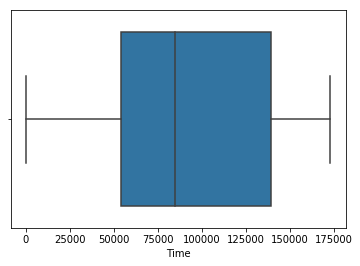

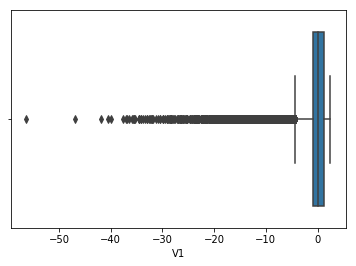

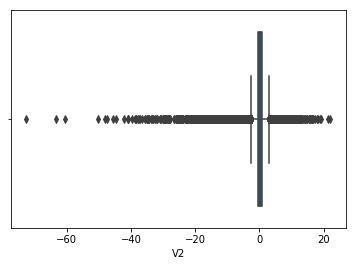

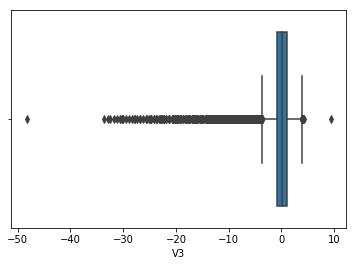

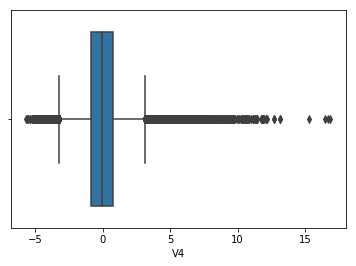

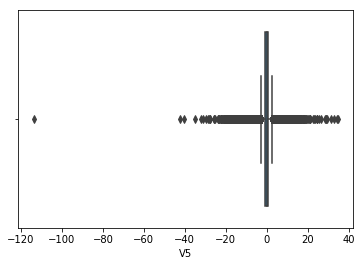

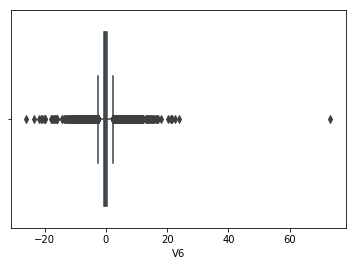

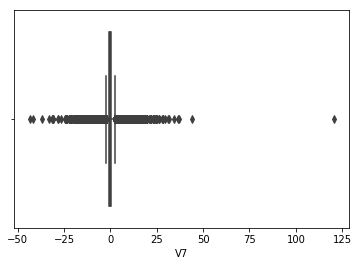

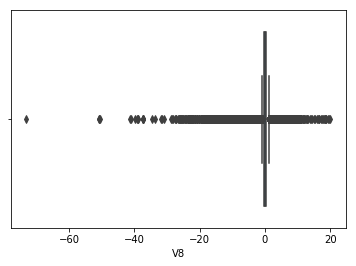

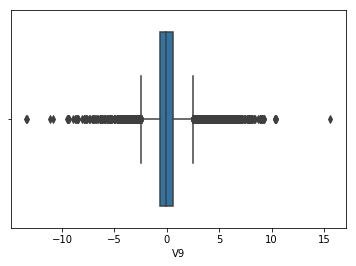

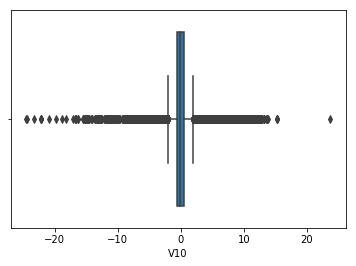

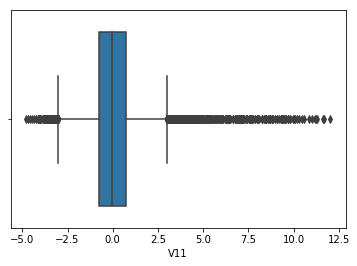

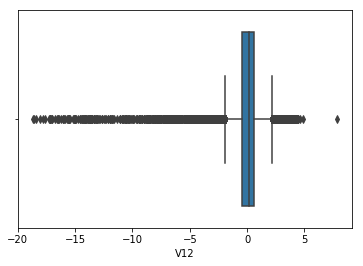

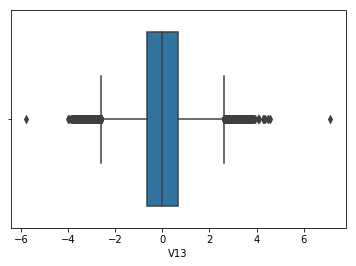

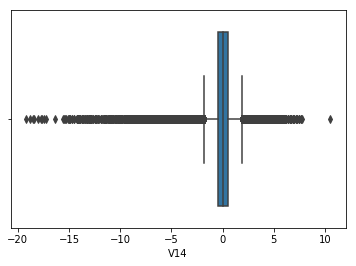

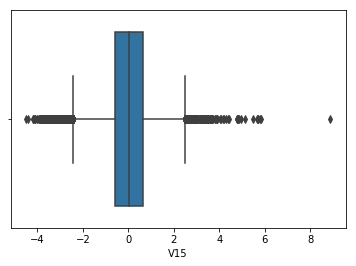

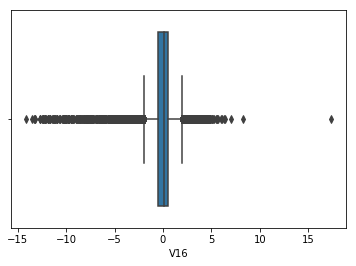

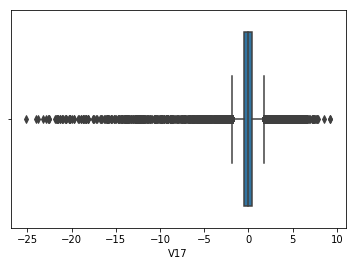

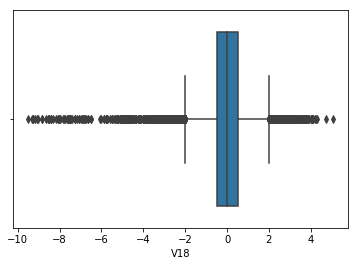

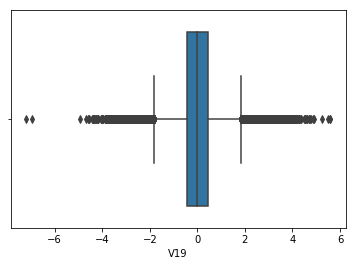

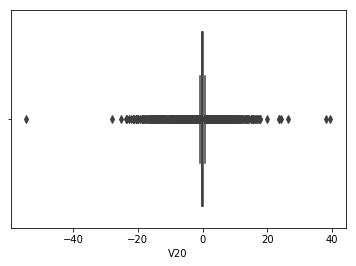

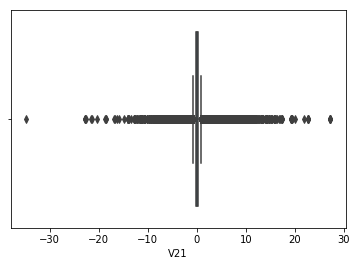

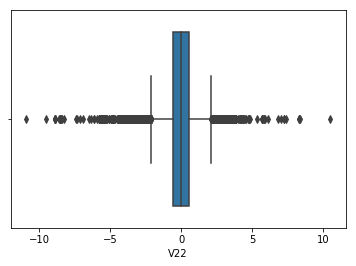

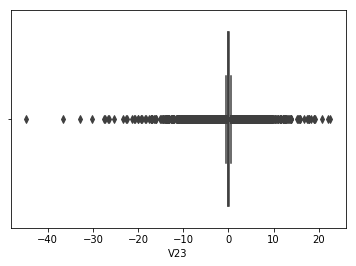

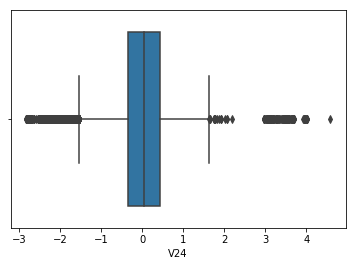

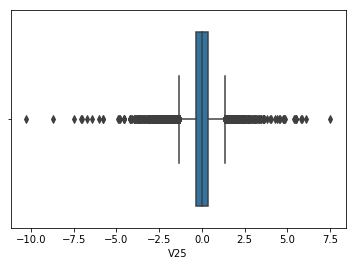

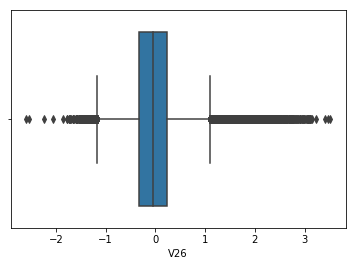

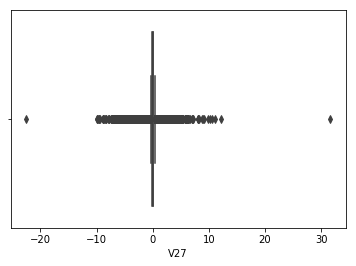

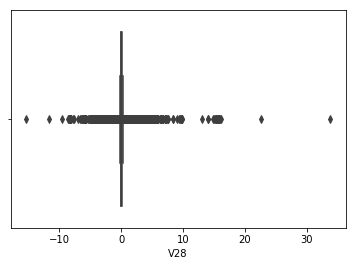

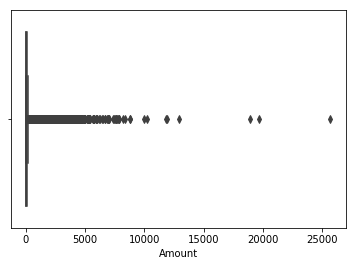

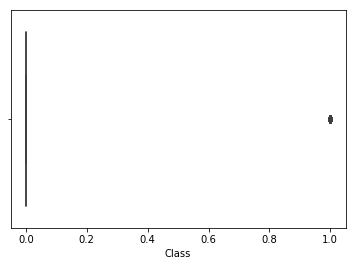

In [18]:
#Visualization on Box Plots to check any Outliers
for i,num in enumerate(cd):
    plt.figure(i)
    sns.boxplot(x=cd[num])

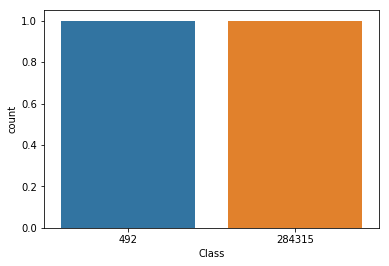

In [19]:
#Check class Imbalance
sns.countplot(x=cd['Class'].value_counts())

In [20]:
#Create Train and Test Split to Train the model
Y = cd['Class']
X = cd.iloc[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7,shuffle=True)

In [21]:
#listing out the Best ML Algorithms
models = []
models.append(('Random Forest with Entropy', RandomForestClassifier(criterion= "entropy", random_state= 111)))
models.append(('Random Forest with gini', RandomForestClassifier(criterion= "gini", random_state= 111)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('XGBoost', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))

In [22]:
#Define a Function to check Evaluation metrics 
def check():
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score"))
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, Y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        #print (name)
        #ROCcurve(fpr, tpr)
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(Y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(Y_test,Y_predict)),2)
        #print (confusion_matrix(Y_test,Y_predict))
        rownumber += 1
    return (model_list)

In [23]:
#Check The Accuracy
print(check())

                        Model Accuracy F1Score
0  Random Forest with Entropy      100    0.86
1     Random Forest with gini      100    0.87
2        Gaussian Naive Bayes       99    0.22
3                     XGBoost      100    0.84
4                        LGBM       99    0.17


In [25]:
# Lets Use Random Forest and perform Hyperparameter tuning

param1 = {
'bootstrap': [True, False],
'max_depth': [10, 20, 30],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [100,200,300,400]
    }

In [26]:
RF = RandomForestClassifier(criterion= "gini")
clf = RandomizedSearchCV(RF,param_distributions=param1,n_jobs = -1, verbose = 2)


In [27]:
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 112.9min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [28]:
print(clf.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [29]:
RF = RandomForestClassifier(criterion= "gini",n_estimators=200,min_samples_split=5,min_samples_leaf=4,
                            max_features='sqrt',max_depth=30)

In [30]:
print(clf.best_score_)

0.9995654940858918


In [31]:
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
predictions = RF.predict(X_test)

In [34]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.80      0.86       100

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
print(confusion_matrix(Y_test,predictions))

[[56856     6]
 [   20    80]]
